In [5]:
import pickle
with open('donnees_nettete.pkl', 'rb') as fichier:
    nettete = pickle.load(fichier)
with open('donnees_bruit_HF.pkl', 'rb') as fichier:
    bruit = pickle.load(fichier)
with open('donnees_resolutions.pkl', 'rb') as fichier:
    resolution = pickle.load(fichier)
with open('donnees_mean_H.pkl', 'rb') as fichier:
    mean_H = pickle.load(fichier)
with open('donnees_mean_S.pkl', 'rb') as fichier:
    mean_S = pickle.load(fichier)
with open('donnees_mean_V.pkl', 'rb') as fichier:
    mean_V = pickle.load(fichier)

In [6]:
features = [nettete,bruit,resolution,mean_H,mean_S,mean_V]
decennies = []
L = [604, 658, 561, 649, 773, 587, 615, 632, 564, 563, 586, 751]
for i in range(len(L)):
    for j in range(L[i]):
        decennies.append(1900 + i * 10) 
        
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)      



In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=2)
rf.fit(train_features, train_labels)

# Prédiction avec la Random Forest
rf_predictions_train = rf.predict(train_features)
rf_predictions_test = rf.predict(test_features)

# Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adadelta', loss='mse')
model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=64)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_rf)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la Random Forest et le réseau de neurones : ", rmse)


Epoch 1/10
95/95 [==============================] - 1s 2ms/step - loss: 2745386.7500
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 2713580.0000
Epoch 3/10
95/95 [==============================] - 0s 1ms/step - loss: 2679382.5000
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 2643072.7500
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 2604850.7500
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 2564899.2500
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 2523384.2500
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 2480450.7500
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 2436218.7500
Epoch 10/10
48/48 [==============================] - 0s 971us/step
RMSE du modèle combinant la Random Forest et le réseau de neurones :  1537.3707108067822


Epoch 1/10
95/95 [==============================] - 1s 1ms/step - loss: 4890196.5000
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 4858759.0000
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 4824848.0000
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 4788715.0000
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 4750550.5000
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 4710506.0000
Epoch 7/10
95/95 [==============================] - 0s 3ms/step - loss: 4668721.5000
Epoch 8/10
95/95 [==============================] - 0s 2ms/step - loss: 4625307.0000
Epoch 9/10
95/95 [==============================] - 0s 2ms/step - loss: 4580358.0000
Epoch 10/10
48/48 [==============================] - 0s 1ms/step
Epoch 1/10
95/95 [==============================] - 1s 1ms/step - loss: 4990364.0000
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 4956183.0000


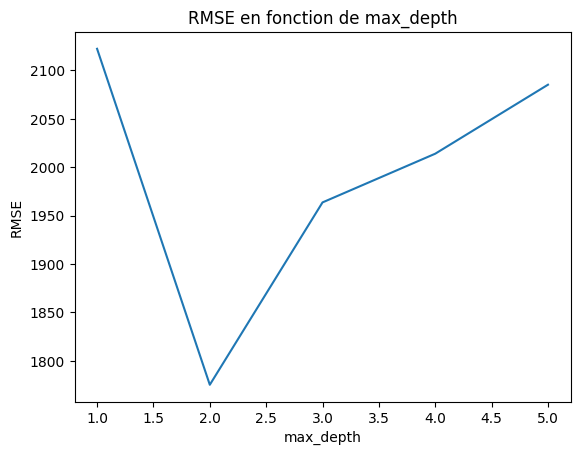

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)


max_depth_values=[]
rmse_values=[]
a=[1,2,3,4,5]
for max_depth in a:
    # Entraînement de la Random Forest
    rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth)
    rf.fit(train_features, train_labels)

    # Prédiction avec la Random Forest
    rf_predictions_train = rf.predict(train_features)
    rf_predictions_test = rf.predict(test_features)

    # Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
    X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
    X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

    # Création et entraînement du réseau de neurones
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adadelta', loss='mse')
    model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=64)

    # Prédiction avec le réseau de neurones
    nn_predictions = model.predict(X_test_with_rf)

    # Évaluation des performances
    mse = np.mean((nn_predictions - test_labels) ** 2)
    rmse = np.sqrt(mse)
    
    max_depth_values.append(max_depth)
    rmse_values.append(rmse)

plt.plot(max_depth_values, rmse_values)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de max_depth')
plt.show()


Epoch 1/10
302/302 [==============================] - 1s 1ms/step - loss: 3411045.7500
Epoch 2/10
302/302 [==============================] - 0s 2ms/step - loss: 3319754.2500
Epoch 3/10
302/302 [==============================] - 1s 2ms/step - loss: 3216120.0000
Epoch 4/10
302/302 [==============================] - 1s 2ms/step - loss: 3102285.2500
Epoch 5/10
302/302 [==============================] - 1s 2ms/step - loss: 2979885.7500
Epoch 6/10
302/302 [==============================] - 0s 1ms/step - loss: 2850093.7500
Epoch 7/10
302/302 [==============================] - 0s 1ms/step - loss: 2712788.7500
Epoch 8/10
302/302 [==============================] - 0s 1ms/step - loss: 2568619.5000
Epoch 9/10
302/302 [==============================] - 0s 1ms/step - loss: 2418139.2500
Epoch 10/10
48/48 [==============================] - 0s 1ms/step
Epoch 1/10
151/151 [==============================] - 1s 1ms/step - loss: 4637455.5000
Epoch 2/10
151/151 [==============================] - 0s 1ms/step

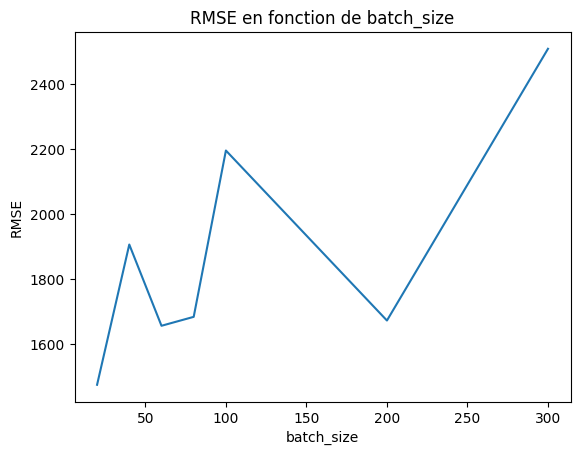

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)


batch_size_values=[]
rmse_values=[]
a=[20,30,40,50,60,70,80,90,100,200,300]
for batch_size in a:
    # Entraînement de la Random Forest
    rf = RandomForestRegressor(n_estimators=100, max_depth=4)
    rf.fit(train_features, train_labels)

    # Prédiction avec la Random Forest
    rf_predictions_train = rf.predict(train_features)
    rf_predictions_test = rf.predict(test_features)

    # Utilisation des prédictions de la Random Forest comme caractéristiques pour le réseau de neurones
    X_train_with_rf = np.concatenate((train_features, rf_predictions_train.reshape(-1, 1)), axis=1)
    X_test_with_rf = np.concatenate((test_features, rf_predictions_test.reshape(-1, 1)), axis=1)

    # Création et entraînement du réseau de neurones
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_rf.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adadelta', loss='mse')
    model.fit(X_train_with_rf, train_labels, epochs=10, batch_size=batch_size)

    # Prédiction avec le réseau de neurones
    nn_predictions = model.predict(X_test_with_rf)

    # Évaluation des performances
    mse = np.mean((nn_predictions - test_labels) ** 2)
    rmse = np.sqrt(mse)
    
    batch_size_values.append(batch_size)
    rmse_values.append(rmse)

plt.plot(batch_size_values, rmse_values)
plt.xlabel('batch_size')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de batch_size')
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la régression logistique
logreg = LogisticRegression()
logreg.fit(train_features, train_labels)

# Prédiction avec la régression logistique
logreg_predictions = logreg.predict(test_features)

# Utilisation des prédictions de la régression logistique comme caractéristiques pour le réseau de neurones
X_train_with_logreg = np.concatenate((train_features, logreg.predict(train_features).reshape(-1, 1)), axis=1)
X_test_with_logreg = np.concatenate((test_features, logreg_predictions.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_logreg.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adadelta', loss='mse')
model.fit(X_train_with_logreg, train_labels, epochs=10, batch_size=64)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_logreg)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la régression logistique et le réseau de neurones : ", rmse)


Epoch 1/10
95/95 [==============================] - 1s 1ms/step - loss: 2916144.5000
Epoch 2/10
95/95 [==============================] - 0s 1ms/step - loss: 2878861.7500
Epoch 3/10
95/95 [==============================] - 0s 1ms/step - loss: 2838814.7500
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 2796332.7500
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 2751664.5000
Epoch 6/10
95/95 [==============================] - 0s 1ms/step - loss: 2705021.5000
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 2656595.0000
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 2606687.5000
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 2555360.2500
Epoch 10/10
48/48 [==============================] - 0s 795us/step
RMSE du modèle combinant la régression logistique et le réseau de neurones :  1572.1076968489892


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow import keras

ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee)

for i in range (len(features)):
    for j in range (len(features[i])):
        M=max(features[i])
        features[i][j]=features[i][j]/M
        
ensemble_donnees = []
for i in range(len(features[0])):
    caracteristiques = []
    for feature in features:
        caracteristique = feature[i]
        caracteristiques.append(caracteristique)
    decennie = decennies[i]
    donnee = (caracteristiques, decennie)
    ensemble_donnees.append(donnee) 

ensemble_donnees = [list(x[0]) + [int(x[1])] for x in ensemble_donnees]
ensemble_donnees = [x[:-1] for x in ensemble_donnees]


# Chargement et préparation des données
# Supposons que vous avez vos données dans les variables ensemble_donnees et decennies
# Convertir les données en tableau numpy
ensemble_donnees = np.array(ensemble_donnees)
decennies = np.array(decennies)

# Normalisation des données
scaler = StandardScaler()
ensemble_donnees = scaler.fit_transform(ensemble_donnees)

# Division des données en ensembles d'entraînement et de test
train_features, test_features, train_labels, test_labels = train_test_split(ensemble_donnees, decennies, test_size=0.2, random_state=42)

# Entraînement de la régression linéaire
linreg = LinearRegression()
linreg.fit(train_features, train_labels)

# Prédiction avec la régression linéaire
linreg_predictions = linreg.predict(test_features)

# Utilisation des prédictions de la régression linéaire comme caractéristiques pour le réseau de neurones
X_train_with_linreg = np.concatenate((train_features, linreg.predict(train_features).reshape(-1, 1)), axis=1)
X_test_with_linreg = np.concatenate((test_features, linreg_predictions.reshape(-1, 1)), axis=1)

# Création et entraînement du réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_with_linreg.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adadelta', loss='mse')
model.fit(X_train_with_linreg, train_labels, epochs=10, batch_size=64)

# Prédiction avec le réseau de neurones
nn_predictions = model.predict(X_test_with_linreg)

# Évaluation des performances
mse = np.mean((nn_predictions - test_labels) ** 2)
rmse = np.sqrt(mse)
print("RMSE du modèle combinant la régression linéaire et le réseau de neurones : ", rmse)


Epoch 1/10
95/95 [==============================] - 1s 1ms/step - loss: 3661998.5000
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 3625898.7500
Epoch 3/10
95/95 [==============================] - 0s 1ms/step - loss: 3587076.7500
Epoch 4/10
95/95 [==============================] - 0s 1ms/step - loss: 3545816.0000
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 3502338.0000
Epoch 6/10
95/95 [==============================] - 0s 1ms/step - loss: 3456824.5000
Epoch 7/10
95/95 [==============================] - 0s 1ms/step - loss: 3409439.5000
Epoch 8/10
95/95 [==============================] - 0s 1ms/step - loss: 3360323.2500
Epoch 9/10
95/95 [==============================] - 0s 1ms/step - loss: 3309597.2500
Epoch 10/10
48/48 [==============================] - 0s 722us/step
RMSE du modèle combinant la régression linéaire et le réseau de neurones :  1795.9789832109357
